## 29/09/23 - Statistics
Population - all the items <br>
Sample - portion of population<br>
`Two types of datas : `<br>
- Primary - Data Collected by ourselves<br>
- Secondary - Data given<br>
<hr>

## Probaility Sample : Simple Random Sample
 - Every individual or item from the frame has an equal chance of being selected

 <hr>

 ## Types of Variables
  - Categorical(qualitative)
  - Numerical (quantitative)
    - Discrete - arises from a counting process
    - Continuous - arises from measuring process
    If categories have order then it's `oridinal` else it's `nominial` <br>
<hr>

## Levels of Measurement 
 - Interval scale : difference b/w measurements is a meaningful quantity but the measurements do not have a true zero point . Example : temperature in degree celsius or fahrenheit

 - Ratio scale - is an ordered scale in which the difference between the measurements is a meaningful quantity and the measurements have a true zero point . Example : Height

 <hr>

## For Visualizing Categorical Data
 - Bar Chart -  for categories
 - Pie Chart - for categories
 - Histogram - Univariate anaylsis
 - Scatter - relationship
 - Line Chart - Condition : Time should be their on horizontal axis

<hr>

## Descriptive Statistics
 - `Central tendency is the extent to which all the data values group around a typical or central value`
 - `The variation  is the amount of dispersion or scattering of values / measure of deviation`
 - `The shape is the pattern of the distribution of values from the lowest value to the highest value`
<hr>

## Measure of Central Tendency
 - `Mean/Arthmetic Mean` : (X1+X2+......+Xn)/n ; `Used when their are no outliers`
 - `Median` - if mean has outliers then we look for median (=n/2 and =(n+1)/2) ; `less sensitive to outliers`
 - `Mode` - most frequent - used for categorical data that is also nominal data

<hr>

## Measure of Variation : 
 - Range - X(largest) - X(Smallest) ; `Ignores the way in which data is distributed`; `Senstitive to outliers`
 - Variance:
   - Low variation : more points close to mean
   - High variation : more points far from the mean
 - Standard deviation
 - Coefficient of variation

`Measures of variation give information on the spread/variablity/dispersion of the data values`

<hr>

## The Sample Variance
`Average(approximately) of squared deviations of values from the mean`
<hr>

## The Sample Standard Deviation
`Most commonly used measure of variation`
`Shows variation about the mean`
`Is the square root of the variation`
`Has the same units as the original data `

<hr>

## Comparing Standard Deviations
`Used when two results in same`
 - Smaller Standard Deviation
 - Larger Standard Deviation

<hr>

## Locating Extreme Outliers : Z-Score
`Z = X - Mean(X)/S`
- |Z|<1 for 68% of data
- |Z|<2 for 95% of data
- |Z|<3 for 99.7% of data

`So, values X with large |Z| can be outliers`

## 03/09/23 - Implementation descriptive statistics

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import plotly.express as px
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

In [4]:
fortune = pd.read_csv("../dataset/Fortune_1000.csv")
fortune.head()

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
0,Walmart,1,0.0,572754.0,13673.0,2300000.0,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,352037
1,Amazon,2,0.0,469822.0,33364.0,1608000.0,Retailing,Seattle,WA,no,no,no,yes,2.0,Andrew R. Jassy,www.amazon.com,AMZN,1202717
2,Apple,3,0.0,365817.0,94680.0,154000.0,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,www.apple.com,AAPL,2443962
3,CVS Health,4,0.0,292111.0,7910.0,258000.0,Health Care,Woonsocket,RI,no,no,yes,yes,4.0,Karen Lynch,https://www.cvshealth.com,CVS,125204
4,UnitedHealth Group,5,0.0,287597.0,17285.0,350000.0,Health Care,Minnetonka,MN,no,no,no,yes,5.0,Andrew P. Witty,www.unitedhealthgroup.com,UNH,500468


In [6]:
fortune.shape

(1000, 18)

In [8]:
fortune.columns

Index(['company', 'rank', 'rank_change', 'revenue', 'profit',
       'num. of employees', 'sector', 'city', 'state', 'newcomer',
       'ceo_founder', 'ceo_woman', 'profitable', 'prev_rank', 'CEO', 'Website',
       'Ticker', 'Market Cap'],
      dtype='object')

In [12]:
fortune.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1000 non-null   object 
 1   rank               1000 non-null   int64  
 2   rank_change        1000 non-null   float64
 3   revenue            1000 non-null   float64
 4   profit             997 non-null    float64
 5   num. of employees  999 non-null    float64
 6   sector             1000 non-null   object 
 7   city               1000 non-null   object 
 8   state              1000 non-null   object 
 9   newcomer           1000 non-null   object 
 10  ceo_founder        1000 non-null   object 
 11  ceo_woman          1000 non-null   object 
 12  profitable         1000 non-null   object 
 13  prev_rank          1000 non-null   object 
 14  CEO                1000 non-null   object 
 15  Website            1000 non-null   object 
 16  Ticker             951 no

In [14]:
fortune.isna().sum()

company               0
rank                  0
rank_change           0
revenue               0
profit                3
num. of employees     1
sector                0
city                  0
state                 0
newcomer              0
ceo_founder           0
ceo_woman             0
profitable            0
prev_rank             0
CEO                   0
Website               0
Ticker               49
Market Cap           31
dtype: int64

In [16]:
fortune.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
rank,1000.0,500.50,288.82,1.0,250.75,500.5,750.25,1000.0
rank_change,1000.0,-0.70,31.82,-178.0,-3.00,0.0,0.00,295.0
revenue,1000.0,17986.80,40813.28,2107.2,3500.75,6375.5,14615.48,572754.0
profit,997.0,2026.48,6421.58,-6520.0,195.40,572.0,1498.30,94680.0
num. of employees,999.0,35788.67,104654.65,160.0,6500.00,13530.0,28900.00,2300000.0


In [19]:
fortune.describe(include="object").T

,count,unique,top,freq
company,1000,1000,Walmart,1
sector,1000,21,Financials,166
city,1000,400,New York,68
state,1000,46,CA,131
newcomer,1000,2,no,970
ceo_founder,1000,2,no,944
ceo_woman,1000,2,no,917
profitable,1000,2,yes,883
prev_rank,1000,469,,531
CEO,1000,994,#REF!,5


In [21]:
fortune.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company,1000,1000,Walmart,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rank,1000.0,NaN,NaN,NaN,500.497,288.818067,1.0,250.75,500.5,750.25,1000.0
rank_change,1000.0,NaN,NaN,NaN,-0.701,31.818674,-178.0,-3.0,0.0,0.0,295.0
revenue,1000.0,NaN,NaN,NaN,17986.8014,40813.281554,2107.2,3500.75,6375.5,14615.475,572754.0
profit,997.0,NaN,NaN,NaN,2026.476329,6421.578081,-6520.0,195.4,572.0,1498.3,94680.0
num. of employees,999.0,NaN,NaN,NaN,35788.668669,104654.648971,160.0,6500.0,13530.0,28900.0,2300000.0
sector,1000,21,Financials,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,1000,400,New York,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,1000,46,CA,131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
newcomer,1000,2,no,970,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
average_rev= fortune['revenue'].mean()
average_rev.round(2)

17986.8

In [30]:
median = fortune['revenue'].median()
median

6375.5

In [29]:
mode = fortune['revenue'].mode()
mode

0    2465.1
1    2764.8
2    2922.5
3    3461.0
4    4230.0
5    5254.7
6    7156.0
Name: revenue, dtype: float64

In [32]:
average_profit = fortune['profit'].mean()
average_profit.round(2)

2026.48

In [ ]:
median = fortune['profit'].median()
median

6375.5

In [37]:
fortune['state'].value_counts()

state
CA    131
TX     97
NY     87
IL     62
OH     54
PA     45
FL     38
VA     34
GA     34
MA     33
MI     31
NC     29
MN     27
CT     24
NJ     23
TN     22
WI     21
MO     21
CO     21
AZ     20
IN     19
WA     17
NV     10
DE      9
OK      8
MD      8
NE      7
RI      7
AR      6
KY      6
OR      5
IA      5
DC      5
LA      5
UT      5
ID      4
KS      4
AL      3
SC      3
ME      2
HI      2
NH      2
VT      1
ND      1
MS      1
PR      1
Name: count, dtype: int64

C:\Users\adity\AppData\Local\Temp\ipykernel_24720\3356802466.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fortune_revenue,bins=10,hist=True,kde=True,label = "Revenue in dollars")


<Axes: xlabel='revenue', ylabel='Density'>

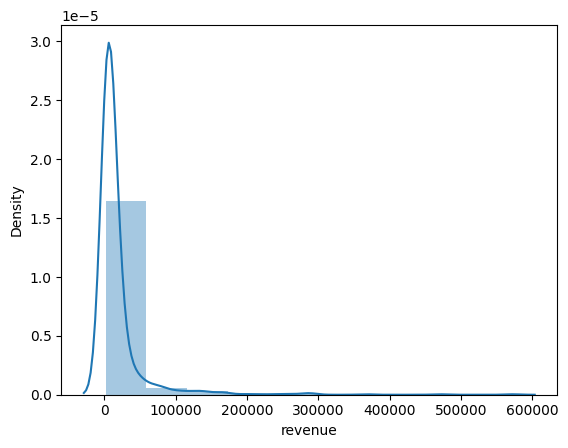

In [42]:
fortune_revenue = fortune['revenue']
sns.distplot(fortune_revenue,bins=10,hist=True,kde=True,label = "Revenue in dollars")

C:\Users\adity\AppData\Local\Temp\ipykernel_24720\1362429389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fortune_profit,bins=10,hist=True,kde=True,label = "Revenue in dollars")


<Axes: xlabel='profit', ylabel='Density'>

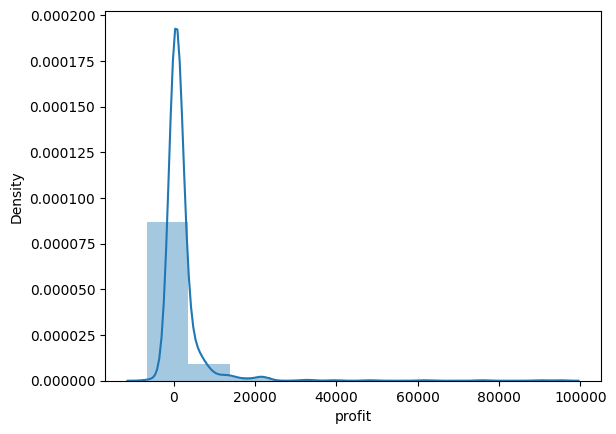

In [93]:
fortune_profit = fortune['profit']
sns.distplot(fortune_profit,bins=10,hist=True,kde=True,label = "Revenue in dollars")

## Variability

In [52]:
min_ = fortune_revenue.min()

In [53]:
max_ = fortune_revenue.max()

In [54]:
range = max_-min_
range

570646.8

In [56]:
fortune_revenue.var()

1665723951.1924706

In [58]:
fortune_revenue.std()

40813.281553833316

In [61]:
Q2 = fortune_revenue.quantile(0.5)
Q2

6375.5

In [62]:
Q3 = fortune_revenue.quantile(0.75)
Q3

14615.475

In [64]:
Q1 = fortune_revenue.quantile(0.25)
Q1

3500.75

In [67]:
iqr = Q3 - Q1
iqr

11114.725

<hr>

In [77]:
min_ = fortune_profit.min()

In [78]:
max_ = fortune_profit.max()

In [79]:
range = max_-min_
range

101200.0

In [80]:
fortune_profit.var()

41236665.04459977

In [81]:
fortune_profit.std()

6421.578080549965

In [82]:
Q2 = fortune_profit.quantile(0.5)
Q2

572.0

In [83]:
Q3 = fortune_profit.quantile(0.75)
Q3

1498.3

In [84]:
Q1 = fortune_profit.quantile(0.25)
Q1

195.4

In [86]:
iqr = Q3 - Q1
iqr

1302.8999999999999

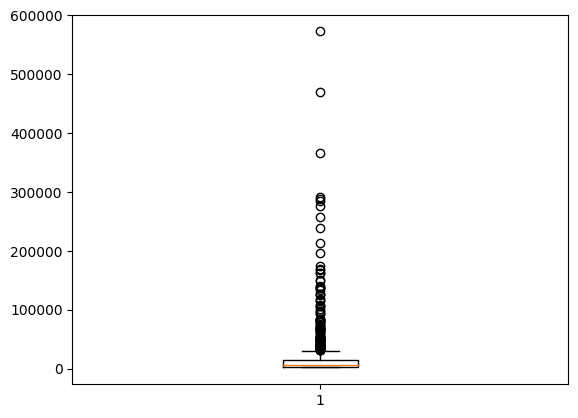

In [90]:
plt.boxplot(fortune_revenue)
plt.show()

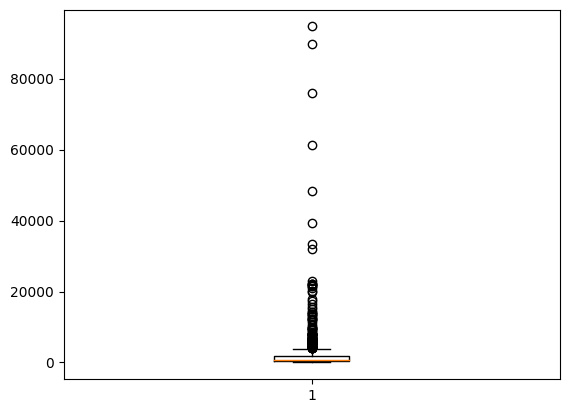

In [96]:
plt.boxplot(fortune_profit[fortune_profit>0])
plt.show()

## Skewness,Kurtosis

In [98]:
fortune_revenue.skew()

6.845409715756327

In [99]:
fortune_revenue.kurt()

64.19728090964593

## 05/10/23 - Inferential statistics
`drawing conclusion from sample about population`<br>
<hr>

## Introduction to inferential statistics
It allows to draw inference about the population data from the sample data.<br>
Do this we do hypothesis testing : `z-test`, `t-test`,`ANOVA` and `Chi-square goodness of fit data`
<hr>

## Sample vs Population
 - Population
    - population is a collection of all the items in the dataset
    - they are usually denoted with an upper case letter N
    - the numbers we obtain by using a population are called parameters
 - Sample
    - A sample is a subset of the population
    - they are usually denoted with the lower case letter n
    - the numbers we obtain by using a sample are called statistic
    - they have two key characteristics - randomness and representatives
    - `Randomness` means a random sample is collected when each member of the sample is choosen from the population strictly by chance
    - `Representativeness` means a representative sample is a subset of the population that accurately reflects the members of the entire population

<hr>


## Sampling distributions
   - Sampling is much more practical but it is prone to sampling error
   - A sample non-represntative of the population introduce **bias**. The method chosen for such sampling is called **sampling bias**
   - The best technique for reducing bias in sampling is **randomization**
   - `Simple random sampling` is the simplest of randomization techniques
   - `Cluster sampling` and `Stratified sampling` are other systematic sampling techniques
<hr>

## Central Limit Theorem
 - Central Limit Theorem is one of the most important theorems in probability theory and statistics
 - It states that, under certain condition, the sum of a large number of random variables is approximately normal
 - A version of the Central Limit Theorem applies to independent identically distributed random variables
 - Suppose that $X_{1}$,$X_{2}$,......,$X_{n}$ are independent identically distributed random variables with expected values, E[$X_{i}$] = u < `infinity` and variance, Var[$X_{i}$] = $sigma_{2}$ < `infinity`
 - Then the sample mean has mean u and variance $sigma_{2}$/n

 ### Assumptions underlying Central Limit Theorem
  - The dataset must follow the randomization condition.It must be sampled randomly
  - Sample drawn should be independent of each other
  - Sample size should not be more that 10% of the population size when sampling is done without replacement
  - The sample size should be large enough. In general, a sample size of 30 is considered sufficient when the population is symmetric

 ### Important points about Central limit theorem
  - CLT is applicable irrespective of the type of the distribution of the population
  - So, given a dataset with unknown distribution, the sample mean will approximate the normal distribution
  - The greater the sample size the lower the standard error. So, the greater the accuracy in determining the population mean from the sample mean
<hr>

## T - test(Parametric test)
 - The t-test is a statistical hypothesis test in which the test statistic follows a Student's t-distribution under the null hypothesis
 - It is used to determine if there is a significant difference between the means of two groups.
 - It is most likely used when the dataset follow a normal distribution and may have unknown variances
 - A t-test is used as a hypothesis testing tool, which allows testing of an assumption applicable to a population

  ### t-test assumptions
   - The sample mean $\bar X$ follows a normal distribution with mean u and variance $sigma_{2}$/n ,  where u and sigma are the mean and standard deviation of the population and n is the sample size
   - The square of the standard error of the mean, $s_{2}$ follows a $x^{2}$ distribution with n-1 degrees of freedom
   - The second assumption is that the data is collected from a representative and randomly selected portion of the total population
   - The sample size used should be resonably large enough. A large sample size means the distribution of results should approacg a normal bell-shaped curve
   - The final assumption is the homogeneity of variance. Homogeneous or equal variance exists when the standard deviations of the samples are approximately equal

   ### Decision Criteria
    - Alternatively, once the t-value and degrees of freedom are determined, a p-value can be found using the table of values from Student's t-distribution
    - If the calculated p-value us below the threshold value for statistical significance, then we reject the null hypothesis in favour of the alternative hypothesis
   
   By default alpha = 0.05, tolerance limit<br>
   Result <0.5 : Alternative is true<br>
   Result >0.5 : Null is true<br>

   ### Types of t-test
   1. One-sample t-Test
      - They are appropriate when a sample is being compared to the population from a hypothesis
      - The population parameters are known in advance or are calculatedd from the population data
      - In testing the null hypothesis ($H_{0}$) that the population mean is equal to a specified value $u_{0}$
   2. Independent two sample t-test
      - Two-sample t-tests are appropriate for comparing two samples
      - These tests are typically experimental and evaluate samples from a controlled experiment
      - These two-sample t-test takes sample data from two groups and calculates the t-value
      - The 2 - sample t-test requires independent groups for each sample
   3. Paired t-test
      - This test is used when the samples are dependent
      - It is used when there is only one sample that has been tested twice(repeated measures) or when there are two samples that have been matched or "paired"
      - The degree of freedom used is n-1, where n represents the number of pairs
<hr>

## ANOVA
 - Acronym : Anaylsis of Variance
 - It can be used in cases where we want to compare the means of more than two groups
 - The ANOVA test allows a comparisonn of more than two groups to determine whether a relationship exists between them
 - The result of the ANOVA formula, the F-statistic(also called F-ratio) allows for the anaylsis of multiple groups of data to determine the variability between samples and within samples
 - The null hypothesis ($H_{0}$) is that there is no real difference exists between the tested groups. So, the result  of the ANOVA's F-ratio statistic will be close to 1.

   ### Assumptions used in ANOVA
    1. The expected values of the errors are zero
    2. The variances of all errors are equal to each other
    3. The errors are independent
    4. They are normally distributed
   
   ### Types of ANOVA
      1. One Way ANOVA
         - When we are comparing more than three groups based on one factor variable, then it is said to be One Way ANOVA
         - The null hypothesis ($H_{0}$) for the test is that the means of the groups are equal
            #### Limitations of one-way ANOVA
            - A one way ANOVA test will tell us that atleast two groups were different from each other
            - But, it won't tell us what groups were different
            - If the test returns a significant f-statistic, we may need to run another test like Least Significant Difference to examine which groups had a difference in means
      2. Two Way ANOVA
         - A two way ANOVA is just the extension of the one way ANOVA
         - When have more than one factor variable, then it is said to be Two way ANOVA
         - It is utilized to observe the interaction between the two factors and test the effect of two factors at the same time
<hr>

## Chi-square goodness of fit test
   - The goodness of fit test is used to test if a sample data fits a distribution from a certain population
   - Chi-square goodness of fit test is the most common of the goodness of fit test
   - The chi-squared test is used to determine whether there is a significant difference between the expected frequencies and the observed frequencies in one or more categories of the data
   - It is a non-parametric test that is used to examine how the observed value of a given phenomenon is different from the expected value
   - This distribution is denoted by $x^{2}$ random variable
   - A random variable is said to have a chi-square distribution with m degrees of freedom if it is the sum of the squares of m independent standard normal random variables
   - Used when relation between categorical data
<hr>

## Linear regression anaylsis
   - In this test, a linear algorithm is used to understand the relationship b/w two variables from the data set
   - One of those variables is the dependent variable,whike there can be one or more independent variables used
   - We try to predict the value of the dependent variable based on the available values of the independent variables
   - This is usually represeted by using a scatter plot
<hr>

## Correlation analysis
 - Correlation anaylsis is a statistical technique used to evaluate the strength of relationship between two quantitative variables
 - Correlation anaylsis is performed to identify the strength of relationships between pair of variables
 - The value of correlation coefficient r varies b/w -1 and 1
 - A value of -1 or +1 for r indicate a perfect correlation(+1 is for perfect positive correlation while -1 is for perfect negative correlation)
 - A value of 0 for r indicate no correlation at all
 - Values of r b/w 0 and 1 indicate partial correlation, which may be significant or not
 - A high correlation means that two or more variables have a strong relationship with each other, while a weak correlation means that variables are hardly related